In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2015.csv
/kaggle/input/2017.csv
/kaggle/input/2019.csv
/kaggle/input/2018.csv
/kaggle/input/2016.csv


In [4]:
df_mundial = pd.read_csv('/kaggle/input/2015.csv')
df_mundial.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# PREPARAR DATOS
# Seleccionar las características y la variable objetivo
X = df_mundial[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']]
y = df_mundial['Happiness Score']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
from sklearn.neighbors import KNeighborsRegressor
# Entrenar el modelo KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


KNeighborsRegressor()

In [10]:
from sklearn.metrics import mean_squared_error, r2_score
# PREDICCIONES Y EVALUAR DATOS
# Realizar predicciones
y_pred = knn.predict(X_test_scaled)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R²):", r2)

Error Cuadrático Medio (MSE): 0.08817026749999998
Coeficiente de Determinación (R²): 0.9378535853349304


In [12]:
X_test_scaled[:5]

array([[-1.54017417, -1.00741888, -0.66944772,  0.06146052,  0.42135654,
         4.58742898, -1.19735577],
       [ 1.01999724,  0.95706867,  1.47052341,  0.43496397,  0.34228115,
        -1.03536307, -0.71967661],
       [ 0.0239055 , -0.87139191, -0.10291177, -1.72192172, -0.61052047,
        -0.98752897, -0.87228999],
       [-2.19523753, -2.05828548, -1.75699818, -2.08474983, -0.30704633,
        -0.29891387, -0.45299783],
       [-1.75174186, -0.13831585, -0.85342676,  0.23259956,  2.11766168,
         2.19817295,  0.04441272]])

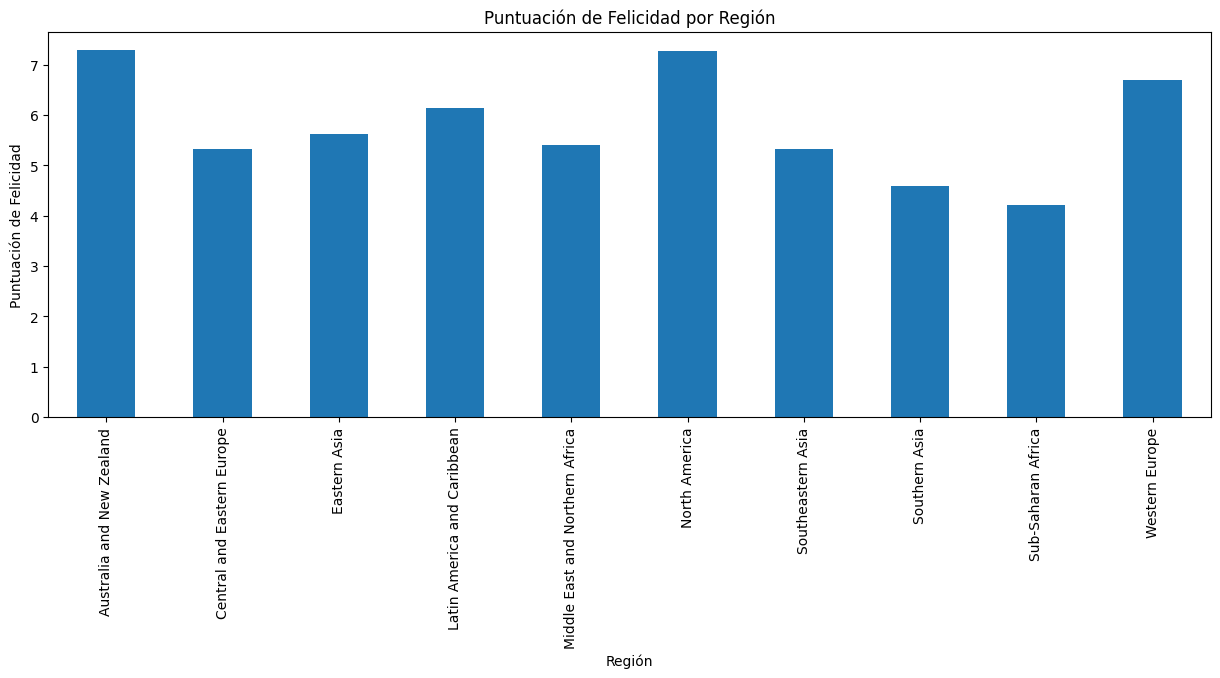

In [4]:
# calcula y muestra el promedio de las puntuaciones de felicidad para cada región en el conjunto de datos
# obtener una visión general del nivel promedio de felicidad en cada región
import matplotlib.pyplot as plt

# Asegúrate de que el DataFrame esté ordenado o agregado correctamente si es necesario
df_mundial.groupby('Region')['Happiness Score'].mean().plot(kind='bar', figsize=(15, 5))

plt.title('Puntuación de Felicidad por Región')
plt.xlabel('Región')
plt.ylabel('Puntuación de Felicidad')
plt.show()

In [ ]:
# # CALCULAR ANALISIS DE CUAL PAIS ES MENOS O MAS FELICES
# Identificar el país más feliz
pais_mas_feliz = df_mundial.loc[df_mundial['Happiness Score'].idxmax()]

In [ ]:
# Identificar el país menos feliz
pais_menos_feliz = df_mundial.loc[df_mundial['Happiness Score'].idxmin()]

In [ ]:
print("Top 10 países más felices:")
print(top_10_felices[['Country', 'Happiness Score']])

In [ ]:
print("\nTop 10 países menos felices:")
print(bottom_10_felices[['Country', 'Happiness Score']])